## 集成模型

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.classifiers = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            classifier = DecisionTreeClassifier(max_depth=1)
            classifier.fit(X, y, sample_weight=w)
            y_pred = classifier.predict(X)

            error = np.sum(w * (y_pred!= y))
            alpha = 0.5 * np.log((1 - error) / error)

            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

            self.classifiers.append(classifier)
            self.alphas.append(alpha)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for classifier, alpha in zip(self.classifiers, self.alphas):
            predictions += alpha * classifier.predict(X)
        return np.sign(predictions)

# 生成示例数据
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# 训练 AdaBoost 集成模型
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X, y)

# 进行预测
y_pred = ada_boost.predict(X)

# 计算准确率
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.874


Linear Dataset Accuracy: 0.89
Circular Dataset Accuracy: 0.71


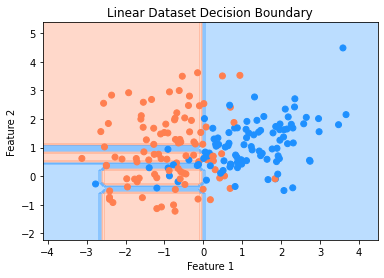

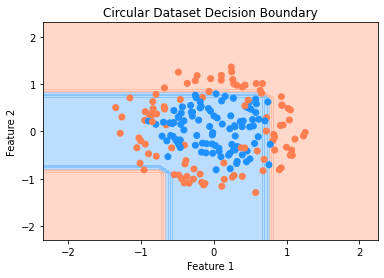

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

class AdaBoostClassifier:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.classifiers = []
        self.alphas = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            classifier = DecisionTreeClassifier(max_depth=3)
            classifier.fit(X, y, sample_weight=w)
            y_pred = classifier.predict(X)

            error = np.sum(w * (y_pred!= y))
            alpha = 0.5 * np.log((1 - error) / error)

            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

            self.classifiers.append(classifier)
            self.alphas.append(alpha)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for classifier, alpha in zip(self.classifiers, self.alphas):
            predictions += alpha * classifier.predict(X)
        return np.sign(predictions)

def plot_decision_boundary(X, y, model, title):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    custom_cmap = ListedColormap(['#FF7F50', '#1E90FF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 生成线性可分数据集
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 生成环形分类数据集
X_circle, y_circle = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)

# 训练 AdaBoost 模型在线性可分数据集上
ada_boost_linear = AdaBoostClassifier(n_estimators=100)
ada_boost_linear.fit(X_linear, y_linear)

# 训练 AdaBoost 模型在环形数据集上
ada_boost_circle = AdaBoostClassifier(n_estimators=1000)
ada_boost_circle.fit(X_circle, y_circle)

# 计算准确率
accuracy_linear = accuracy_score(y_linear, ada_boost_linear.predict(X_linear))
accuracy_circle = accuracy_score(y_circle, ada_boost_circle.predict(X_circle))

print(f"Linear Dataset Accuracy: {accuracy_linear}")
print(f"Circular Dataset Accuracy: {accuracy_circle}")

# 绘制决策边界
plot_decision_boundary(X_linear, y_linear, ada_boost_linear, 'Linear Dataset Decision Boundary')
plot_decision_boundary(X_circle, y_circle, ada_boost_circle, 'Circular Dataset Decision Boundary')

### 请直接调用scikit-learn中集成分类模型对上述数据集进行分类，输出精度和决策边界
在AdaBoostClassifier(n_estimators=100)中，n_estimators参数指定了集成模型中弱学习器（基分类器）的数量为 100。
这里默认情况下，基分类器是决策树桩（Decision Stump，即深度为 1 的决策树）。每个弱学习器在每次迭代中根据样本的权重进行训练，并且通过调整权重来关注那些被前一个弱学习器错误分类的样本。随着更多的弱学习器被添加到集成中，模型的性能逐渐提高。

Linear Dataset Accuracy: 0.975
Circular Dataset Accuracy: 1.0


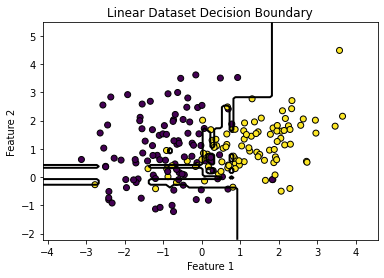

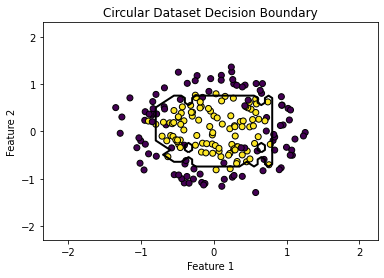

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 生成线性可分数据集
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 生成环形分类数据集
X_circle, y_circle = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)

# 使用 AdaBoost 分类器在两个数据集上进行训练和预测
ada_boost_linear = AdaBoostClassifier(n_estimators=100)
ada_boost_linear.fit(X_linear, y_linear)
y_pred_linear = ada_boost_linear.predict(X_linear)
accuracy_linear = accuracy_score(y_linear, y_pred_linear)

ada_boost_circle = AdaBoostClassifier(n_estimators=100)
ada_boost_circle.fit(X_circle, y_circle)
y_pred_circle = ada_boost_circle.predict(X_circle)
accuracy_circle = accuracy_score(y_circle, y_pred_circle)

print(f"Linear Dataset Accuracy: {accuracy_linear}")
print(f"Circular Dataset Accuracy: {accuracy_circle}")

def plot_decision_boundary(X, y, model, title):
    # 设置白色背景
    plt.figure(facecolor='white')
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 调整等高线水平设置
    plt.contour(xx, yy, Z, levels=[-0.5, 0.5], colors='k', linewidths=2)
    # 不同类别点用不同颜色显示
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制决策边界
plot_decision_boundary(X_linear, y_linear, ada_boost_linear, 'Linear Dataset Decision Boundary')
plot_decision_boundary(X_circle, y_circle, ada_boost_circle, 'Circular Dataset Decision Boundary')

### 如何为AdaBoostClassifier(n_estimators=100)指定基分类器

SVC(probability=True)
Linear Dataset Accuracy: 0.745
Circular Dataset Accuracy: 0.905


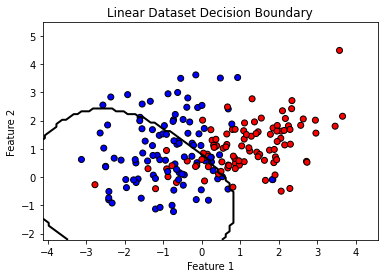

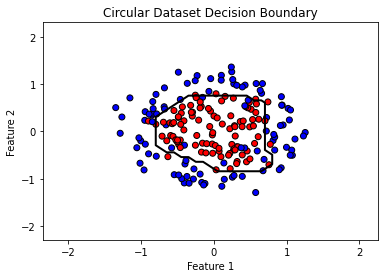

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# 生成线性可分数据集
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 生成环形分类数据集
X_circle, y_circle = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)

# 使用 AdaBoost 分类器并指定基分类器为支持向量机（SVM）
ada_boost_linear = AdaBoostClassifier(n_estimators=100, base_estimator=SVC(probability=True))
print(ada_boost_linear.base_estimator)  # 直接打印传入的 base_estimator 参数
ada_boost_linear.fit(X_linear, y_linear)
y_pred_linear = ada_boost_linear.predict(X_linear)
accuracy_linear = accuracy_score(y_linear, y_pred_linear)

ada_boost_circle = AdaBoostClassifier(n_estimators=100, base_estimator=SVC(probability=True))
ada_boost_circle.fit(X_circle, y_circle)
y_pred_circle = ada_boost_circle.predict(X_circle)
accuracy_circle = accuracy_score(y_circle, y_pred_circle)

print(f"Linear Dataset Accuracy: {accuracy_linear}")
print(f"Circular Dataset Accuracy: {accuracy_circle}")

def plot_decision_boundary(X, y, model, title):
    # 设置白色背景
    plt.figure(facecolor='white')
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制决策边界为黑色线条
    plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)
    # 不同类别点用不同颜色显示
    colors = ['r' if label == 1 else 'b' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制决策边界
plot_decision_boundary(X_linear, y_linear, ada_boost_linear, 'Linear Dataset Decision Boundary')
plot_decision_boundary(X_circle, y_circle, ada_boost_circle, 'Circular Dataset Decision Boundary')